In [164]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import seaborn as sns
# !pip install -q cufflinks  
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [165]:
all_vel_agg = pd.read_csv('/../edsa-traffic/SANRAL/all_vel_agg.csv')
all_vel_agg.head()

,Unnamed: 0,day,hour,start_gantry,gantry,count,mean,median,prec80,std
0,0,1.0,7.0,1001.0,1002.0,2.0,6.713848,6.713848,7.717085,2.364652
1,1,1.0,8.0,1001.0,1002.0,1.0,5.130874,5.130874,5.130874,NaN
2,2,1.0,9.0,1001.0,1002.0,7.0,27.059633,5.502707,7.413323,57.440661
3,3,1.0,10.0,1001.0,1002.0,4.0,6.420032,6.321328,8.042623,2.192687
4,4,1.0,11.0,1001.0,1002.0,1.0,3.850211,3.850211,3.850211,NaN


In [166]:
df = all_vel_agg.groupby('gantry')[['hour','count']].mean()

X = df.values

X[0:5]

array([[ 11.94106412,  30.43437926],
       [ 12.0807149 , 231.6707985 ],
       [ 11.99134449, 187.16176188],
       [ 12.11863986, 123.34499876],
       [ 12.00202371, 149.60769008]])

In [167]:
# Feature Standardisation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [168]:
X[0:5]

array([[-0.76595872, -1.68940311],
       [ 0.21086302,  2.19284455],
       [-0.41426031,  1.3341774 ],
       [ 0.47613847,  0.1030261 ],
       [-0.33956191,  0.60968524]])

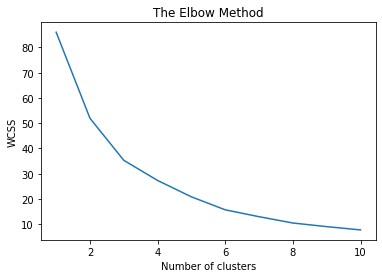

In [169]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i,init='k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# plot the WCSS
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [170]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [171]:
y_kmeans

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2],
      dtype=int32)

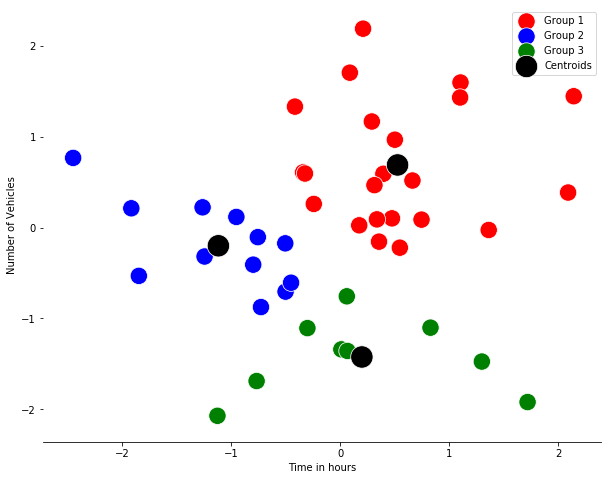

In [172]:
# Visualising the clusters
plt.figure(figsize=(10,8))
ax = sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],sizes=(300,300),size=100,legend=False, color = 'red', label = 'Group 1')
ax1 = sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],sizes=(300,300), size = 100,legend=False, color = 'blue', label = 'Group 2')
ax2 = sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],sizes=(300,300), size = 100,legend=False, color = 'green', label = 'Group 3')
ax2 = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],sizes=(500,500),legend=False, size = 300, color = 'black', label = 'Centroids')
plt.xlabel('Time in hours')
plt.ylabel('Number of Vehicles')
sns.despine(left=True)
plt.legend()
plt.show()

In [173]:
#  !pip install --upgrade networkx 

In [174]:
# # !pip install hdbscan
# import hdbscan

# labels = hdbscan.HDBSCAN().fit_predict(X)

In [175]:
# labels

In [176]:
# clustered = (labels >= 0)
# plt.scatter(X[~clustered, 0],
#             X[~clustered, 1],
# #            c=labels[clustered],
#             s=30,
#             )
# plt.scatter(X[clustered, 0],
#             X[clustered, 1],
            
#             s=30,
#             color ='red');

In [177]:
#Importing SANRAL the data
all_cars_agg = pd.read_csv('/../edsa-traffic/SANRAL/all_cars_agg.csv')
all_cars_agg.head()
cars_cols = ['vehicle', 'Unnamed: 0','Unnamed: 0.1', 'distance','velocity_min',
             'velocity_max', 'velocity_std', 'hour_min','hour_std', 'distance_max', 'distance_min','distance_std']

In [178]:
all_vel_agg = pd.read_csv('/../edsa-traffic/SANRAL/all_vel_agg.csv')
df_agg_counts = pd.read_csv('/../edsa-traffic/SANRAL/df_agg_counts.csv')
gantry_locations = pd.read_csv('/../edsa-traffic/SANRAL/gantry_locations.csv')


In [179]:
all_cars_agg.drop(cars_cols,axis=1,inplace=True)
all_cars_agg['speed'] = all_cars_agg['hour']*all_cars_agg['velocity']
all_cars_agg['distance'] = all_cars_agg['hour']*all_cars_agg['speed']


In [180]:
all_cars_agg['duration'] = all_cars_agg['hour_mean'] 
c_cols = ['distance_mean', 'hour_mean', 'hour_max']
all_cars_agg.drop(c_cols,axis=1,inplace=True)
all_cars_agg['actual_time'] = pd.to_datetime(all_cars_agg['time']).dt.time
all_cars_agg.head()

,time,gantry,class,start_gantry,duration,same_vehicle_flag,velocity,hour,velocity_mean,speed,distance,actual_time
0,2014-10-01 07:29:10,1021,2,1021,13.314815,True,1.581972,7,72.310135,11.073803,77.516620,07:29:10
1,2014-10-01 19:04:03,1008,2,1008,13.833333,True,1.040171,19,63.792628,19.763258,375.501911,19:04:03
2,2014-10-01 11:06:00,1044,3,1032,11.925926,True,55.942446,11,58.798236,615.366906,6769.035971,11:06:00
3,2014-10-01 10:02:23,1008,2,1008,12.481481,True,1.609318,10,79.815129,16.093184,160.931843,10:02:23
4,2014-10-01 18:06:45,1003,2,1002,11.277778,True,2.301399,18,72.962751,41.425182,745.653267,18:06:45


- speed and time

In [181]:
df = all_cars_agg.groupby('gantry')[['hour','speed']].mean()

X = df.values

X[0:5]

array([[  9.85460496,  53.24407108],
       [  9.47081353, 443.88938463],
       [ 10.95507141, 562.25111112],
       [  9.32443187, 361.21226283],
       [ 10.64521526, 330.58351407]])

In [182]:
# Feature Standardisation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X[0:5]

array([[-0.84246315, -2.29965468],
       [-1.16875057, -0.33099278],
       [ 0.09311887,  0.2654926 ],
       [-1.29319966, -0.74764516],
       [-0.1703111 , -0.90199912]])

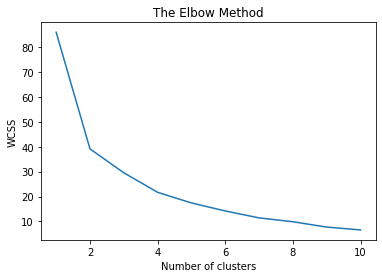

In [183]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i,init='k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# plot the WCSS
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [184]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1],
      dtype=int32)

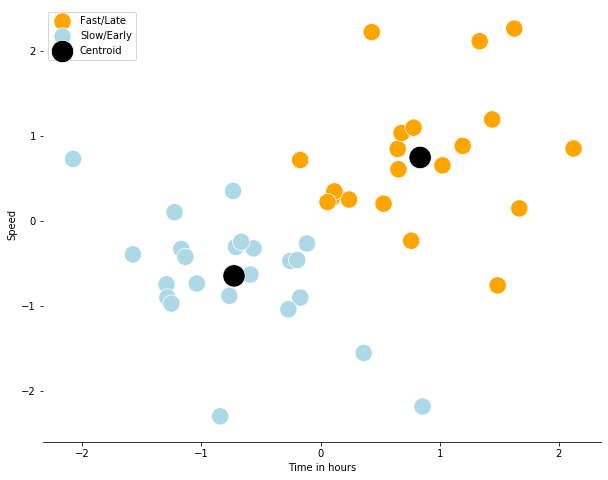

In [185]:
# Visualising the clusters
plt.figure(figsize=(10,8))
ax = sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],sizes=(300,300),size=100,legend=False, color = 'orange', label = 'Fast/Late')
ax1 = sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],sizes=(300,300), size = 100,legend=False, color = 'lightblue', label = 'Slow/Early')
# ax2 = sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],sizes=(300,300), size = 100,legend=False, color = 'green', label = 'Cluster 3')
ax2 = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],sizes=(500,500),legend=False, size = 300, color = 'black', label = 'Centroid')
plt.xlabel('Time in hours')
plt.ylabel('Speed')
sns.despine(left=True)
plt.legend()
plt.show()

- speed and distance

In [186]:
df = all_cars_agg.groupby('gantry')[['hour','distance']].mean()

X = df.values

X[0:5]

array([[   9.85460496,  608.46496451],
       [   9.47081353, 5182.26307326],
       [  10.95507141, 7438.25251962],
       [   9.32443187, 4028.87662746],
       [  10.64521526, 4367.86561151]])

In [187]:
# Feature Standardisation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X[0:5]

array([[-0.84246315, -1.99035169],
       [-1.16875057, -0.51610276],
       [ 0.09311887,  0.21105876],
       [-1.29319966, -0.88786791],
       [-0.1703111 , -0.77860333]])

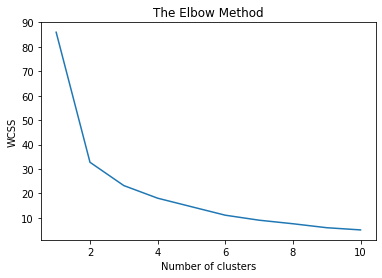

In [188]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i,init='k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# plot the WCSS
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [189]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1],
      dtype=int32)

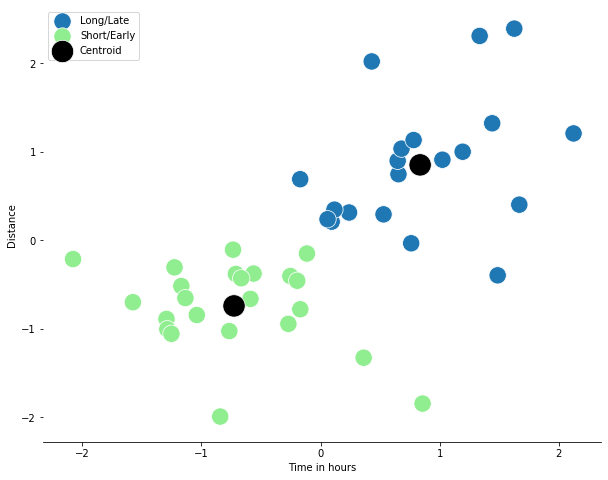

In [190]:
# Visualising the clusters
plt.figure(figsize=(10,8))
ax = sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],sizes=(300,300),size=100,legend=False, label = 'Long/Late')
ax1 = sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],sizes=(300,300), size = 100,legend=False, color = 'lightgreen', label = 'Short/Early')
# ax2 = sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],sizes=(300,300), size = 100,legend=False, color = 'green', label = 'Cluster 3')
ax2 = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],sizes=(500,500),legend=False, size = 300, color = 'black', label = 'Centroid')
plt.xlabel('Time in hours')
plt.ylabel('Distance')
sns.despine(left=True)
plt.legend()
plt.show()